# Preprocessing

## Importing and Modifying Dataset

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Reading datasets
dfs = []
for i in range(1,5):
    path = 'data/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)

In [58]:
# This csv file contains names of all the features
df_col = pd.read_csv('data/NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
data.columns = df_col['Name']
dataSet = data
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [59]:


#dataSet = pd.read_csv('data/UNSW_NB15.csv')
#drop id and label columns
#dataSet = dataSet.iloc[:,1:49]
#dataSet.head()

In [60]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [61]:
# check if there are Null values
dataSet.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [62]:
dataSet.shape

(2540047, 49)

In [63]:
dataSet.describe()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [64]:
dataSet['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [65]:
dataSet['attack_cat'] = dataSet.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [66]:
dataSet['attack_cat'] = dataSet['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [67]:
dataSet['attack_cat'].unique()

array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

In [68]:
numerical_col = dataSet.select_dtypes(include=np.number).columns  # All the numerical columns list
categorical_col = dataSet.select_dtypes(exclude=np.number).columns  # All the categorical columns list

In [69]:

 # Cleaning the data
# Convert the column to numeric type
dataSet['ct_ftp_cmd'] = pd.to_numeric(dataSet['ct_ftp_cmd'], errors='coerce')

# Calculate the median and replace null values
val = dataSet['ct_ftp_cmd'].median()
dataSet['ct_ftp_cmd'] = dataSet['ct_ftp_cmd'].fillna(value=val)
for col in dataSet.columns:
    if dataSet[col].dtypes == 'object' :
        val = dataSet[col].mode().values[0]  # Mode value of the column in train data
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    else:
        val = dataSet[col].median()
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    print(col,val)

srcip 59.166.0.4
sport 1043
dstip 149.171.126.3
dsport 53
proto tcp
state FIN
dur 0.015861
sbytes 1470.0
dbytes 1820.0
sttl 31.0
dttl 29.0
sloss 3.0
dloss 4.0
service -
sload 589303.75
dload 589317.875
spkts 12.0
dpkts 12.0
swin 255.0
dwin 255.0
stcpb 639725026.0
dtcpb 638417164.0
smeansz 73.0
dmeansz 89.0
trans_depth 0.0
res_bdy_len 0.0
sjit 19.124899
djit 2.653561
stime 1424226977.0
ltime 1424226978.0
sintpkt 0.468262
dintpkt 0.414755
tcprtt 0.000613
synack 0.000483
ackdat 0.000122
is_sm_ips_ports 0.0
ct_state_ttl 0.0
ct_flw_http_mthd 0.0
is_ftp_login 0.0
ct_ftp_cmd 0.0
ct_srv_src 5.0
ct_srv_dst 5.0
ct_dst_ltm 3.0
ct_src_ltm 4.0
ct_src_dport_ltm 1.0
ct_dst_sport_ltm 1.0
ct_dst_src_ltm 2.0
attack_cat normal
label 0.0


In [70]:
# check if there are Null values
dataSet.isnull().sum()

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

In [71]:
# Fixing binary columns 
dataSet['is_ftp_login'] = np.where(dataSet['is_ftp_login']>1, 1, dataSet['is_ftp_login'])

In [72]:
for col in dataSet.columns:
    print(col)
    print(dataSet[col].unique()) 

srcip
['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
sport
['1390' '33661' '1464' ... 533 933 706]
dstip
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.1

['dns' '-' 'http' 'smtp' 'ftp-data' 'ftp' 'ssh' 'pop3' 'snmp' 'ssl' 'irc'
 'radius' 'dhcp']
sload
[500473.9375   87676.08594 521894.5313  ...  12496.51367 198981.25
  24465.67188]
dload
[  621800.9375     50480.17188   636282.375   ...   598375.0625
 10915975.        146610.7656 ]
spkts
[    2     4     1    12    14    10     6    26    32     5    20    18
     8    16    28    30    64    66     3    24    42    52    78    80
    40   334    38    22   122   106    62    54    44   110   108   364
   112   456   448   446   442   452   454   460   450    76   680   672
   568   668   572   562   440   444   428   662   556   338   226   228
   222   230   296   234   204   206    48    68   218   372   240   238
   294    50   366    70   358    90   362   114   210   356   224   232
   216   212    92   242    60   244   350   214   340   354   208    34
   286    46   236   310   292    36   130   360    88   220   104    72
   252   352   198   200   308   118   290   282   346 

['normal' 'exploits' 'reconnaissance' 'dos' 'generic' 'shellcode'
 'fuzzers' 'worms' 'backdoor' 'analysis']
label
[0 1]


In [73]:
#dataSet['ct_ftp_cmd'] = dataSet['ct_ftp_cmd'].astype(float)

In [74]:
def clean_data(data):
    '''
    Cleans given raw data. Performs various cleaning, removes Null and wrong values.
    Check for columns datatype and fix them.
    '''
    numerical_col = data.select_dtypes(include=np.number).columns  # All the numerical columns list
    categorical_col = data.select_dtypes(exclude=np.number).columns  # All the categorical columns list
    
    # Cleaning the data
    for col in data.columns:
        val = mode_dict[col]  # Mode value of the column in train data
        data[col] = data[col].fillna(value=val)
        data[col] = data[col].replace(' ', value=val)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)
# Fixing binary columns
        if col in saved_dict['binary_col']:
            data[col] = np.where(data[col]>1, val, data[col])
# Fixing datatype of columns
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    for bad_col in bad_dtypes:
        data[col] = data[col].astype(float)
    
    return data

In [75]:
dataSet.drop(['label','stime','ltime'], axis=1, inplace=True)

## Enconding

### 1-N encoding

In [76]:
dataSet['attack_cat'].unique()

array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

In [77]:

dataSet['attack_cat'].replace({ 'dos' : 1, 'normal':0, 'reconnaissance':0, 'backdoor':0, 'exploits':0,
       'analysis':0, 'fuzzers':0, 'worms':0, 'shellcode':0, 'generic':0},inplace = True)

In [78]:
for col_name in dataSet.columns:
    if dataSet[col_name].dtypes == 'object' :
        unique_cat = len(dataSet[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'srcip' has 43 categories
Feature 'sport' has 129124 categories
Feature 'dstip' has 47 categories
Feature 'dsport' has 64630 categories
Feature 'proto' has 135 categories
Feature 'state' has 16 categories
Feature 'service' has 13 categories


### Label Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['srcip','sport','dstip','dsport','proto','service','state'] 
for f in features:
    dataSet[f] = dataSet[f].astype(str)
for f in features:
    dataSet[f] = le.fit_transform(dataSet[f]) 


# One-hot encode categorical variables
#dataSet = pd.get_dummies(dataSet, columns=['state'])
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,33,4276,24,47344,120,2,0.001055,132,164,31,...,0.0,0.0,3,7,1,3,1,1,1,0
1,33,26036,27,253,120,2,0.036133,528,304,31,...,0.0,0.0,2,4,2,3,1,1,2,0
2,39,5091,25,47344,120,2,0.001119,146,178,31,...,0.0,0.0,12,8,1,2,2,1,1,0
3,38,28534,23,47344,120,2,0.001209,132,164,31,...,0.0,0.0,6,9,1,1,1,1,1,0
4,36,43654,8,47344,120,2,0.001169,146,178,31,...,0.0,0.0,7,9,1,1,1,1,1,0


In [80]:
x = dataSet.iloc[:,0:45]
y = dataSet.iloc[:,45]

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

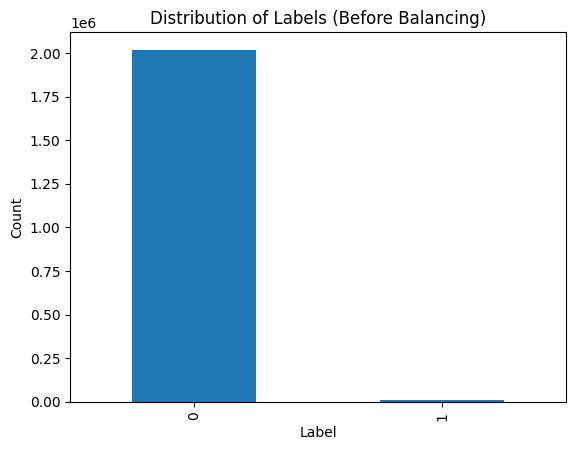

In [81]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

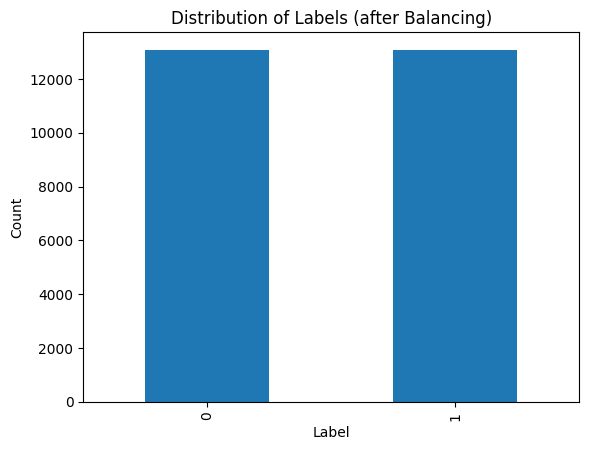

In [82]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
plt.show()

In [83]:
#Decesion tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

predicted = dt.predict(x_test)


accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


Accuracy: 0.9718607901419264 

                Predicted DOS  Predicted Not DOS
Actual DOS             490504              14235
Actual Not DOS             60               3211 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    504739
           1       0.18      0.98      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [84]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.754252869038011 

                Predicted DOS  Predicted Not DOS
Actual DOS             380226             124513
Actual Not DOS            329               2942 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86    504739
           1       0.02      0.90      0.05      3271

    accuracy                           0.75    508010
   macro avg       0.51      0.83      0.45    508010
weighted avg       0.99      0.75      0.85    508010



In [85]:
from sklearn.ensemble import RandomForestClassifier
Rf =  RandomForestClassifier(random_state=88)
Rf.fit(x_train, y_train)



predicted = Rf.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.971913938701994 

                Predicted DOS  Predicted Not DOS
Actual DOS             490477              14262
Actual Not DOS              6               3265 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    504739
           1       0.19      1.00      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [86]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(x_train,y_train)

predicted = NB.predict(x_test)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.7534576091021831 

                Predicted DOS  Predicted Not DOS
Actual DOS             380047             124692
Actual Not DOS            554               2717 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86    504739
           1       0.02      0.83      0.04      3271

    accuracy                           0.75    508010
   macro avg       0.51      0.79      0.45    508010
weighted avg       0.99      0.75      0.85    508010



In [87]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)

kNN.fit(x_train,y_train)

predicted = kNN.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9287297494143816 

                Predicted DOS  Predicted Not DOS
Actual DOS             468728              36011
Actual Not DOS            195               3076 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    504739
           1       0.08      0.94      0.15      3271

    accuracy                           0.93    508010
   macro avg       0.54      0.93      0.55    508010
weighted avg       0.99      0.93      0.96    508010



In [88]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(random_state=88)

# Train the classifier using the training data
svm.fit(x_train,y_train)

predicted = svm.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.5773764295978425 

                Predicted DOS  Predicted Not DOS
Actual DOS             290647             214092
Actual Not DOS            605               2666 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.73    504739
           1       0.01      0.82      0.02      3271

    accuracy                           0.58    508010
   macro avg       0.51      0.70      0.38    508010
weighted avg       0.99      0.58      0.73    508010



## Normalization

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
dataSet=pd.DataFrame(scaler.fit_transform(dataSet),
            columns=dataSet.columns, index=dataSet.index) 



dataSet.head(20)


Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,0.785714,0.066193,0.521739,0.732550,0.895522,0.133333,1.200687e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.030303,0.090909,0.000000,0.030303,0.000000,0.000000,0.000000,0.0
1,0.785714,0.403040,0.586957,0.003915,0.895522,0.133333,4.112267e-06,0.000037,0.000021,0.121569,...,0.0,0.0,0.015152,0.045455,0.015152,0.030303,0.000000,0.000000,0.015152,0.0
2,0.928571,0.078809,0.543478,0.732550,0.895522,0.133333,1.273525e-07,0.000010,0.000012,0.121569,...,0.0,0.0,0.166667,0.106061,0.000000,0.015152,0.015152,0.000000,0.000000,0.0
3,0.904762,0.441710,0.500000,0.732550,0.895522,0.133333,1.375953e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.075758,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.857143,0.675769,0.173913,0.732550,0.895522,0.133333,1.330429e-07,0.000010,0.000012,0.121569,...,0.0,0.0,0.090909,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.785714,0.376755,0.586957,0.018598,0.895522,0.133333,8.915697e-06,0.000040,0.000021,0.121569,...,0.0,0.0,0.015152,0.045455,0.015152,0.030303,0.000000,0.000000,0.015152,0.0
6,0.928571,0.194384,0.478261,0.732550,0.895522,0.133333,1.290596e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.166667,0.090909,0.000000,0.015152,0.015152,0.000000,0.000000,0.0
7,0.047619,0.000015,0.043478,0.000015,0.044776,0.400000,0.000000e+00,0.000003,0.000000,0.000000,...,0.0,0.0,0.015152,0.015152,0.015152,0.015152,0.015152,0.016949,0.015152,0.0
8,0.904762,0.523414,0.521739,0.732550,0.895522,0.133333,1.281491e-07,0.000010,0.000012,0.121569,...,0.0,0.0,0.075758,0.090909,0.030303,0.000000,0.000000,0.000000,0.000000,0.0
9,0.952381,0.045063,0.478261,0.732550,0.895522,0.133333,1.328153e-07,0.000009,0.000011,0.121569,...,0.0,0.0,0.075758,0.090909,0.015152,0.000000,0.000000,0.000000,0.000000,0.0


## Data balancing

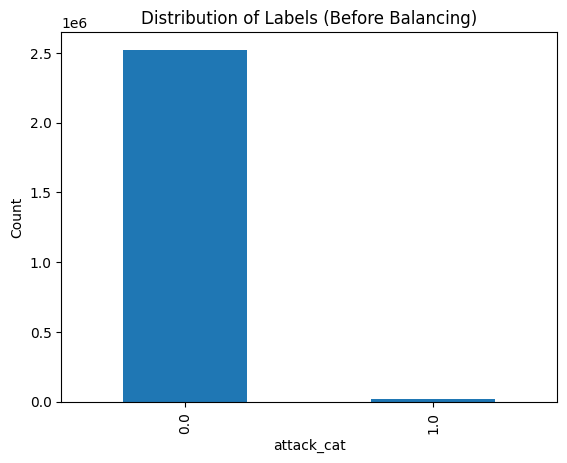

In [90]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
dataSet['attack_cat'].value_counts().plot(kind='bar')
plt.xlabel('attack_cat')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

In [91]:
x = dataSet.iloc[:,0:45]
y = dataSet.iloc[:,45]

In [92]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

In [93]:
#combined_data = pd.concat([x_train, x_test])
# Perform one-hot encoding on the combined dataset
#combined_data = pd.get_dummies(combined_data, columns=['proto', 'service', 'state'])

In [94]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
 
#combined_data=pd.DataFrame(scaler.fit_transform(combined_data),
           # columns=combined_data.columns, index=combined_data.index) 



#combined_data.head(20)

In [95]:
# Split the dataset back into training and test sets
#x_train= combined_data.iloc[:x_train.shape[0], :]
#x_test = combined_data.iloc[x_train.shape[0]:, :]

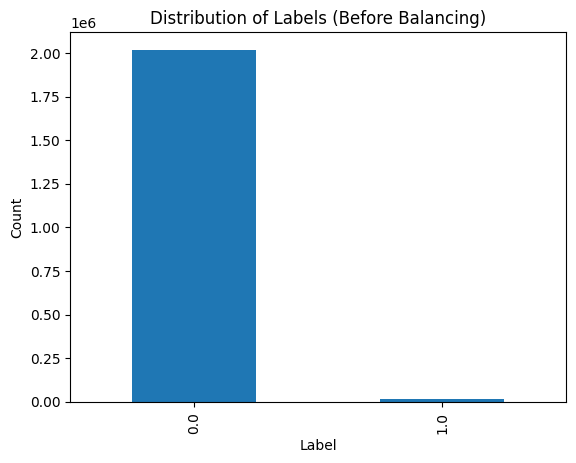

In [96]:
# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

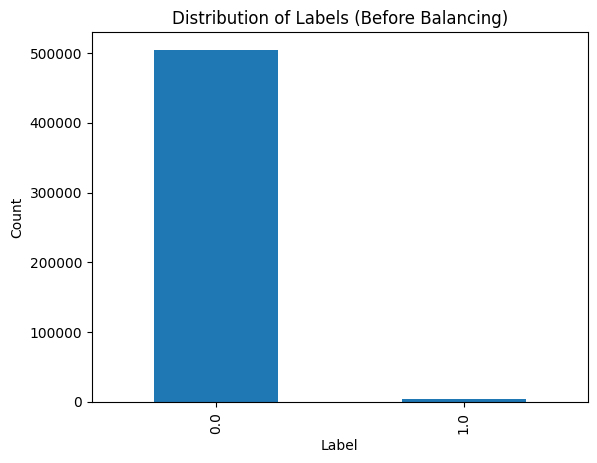

In [97]:
# plot the distribution of the 'label' column before balancing
y_test.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

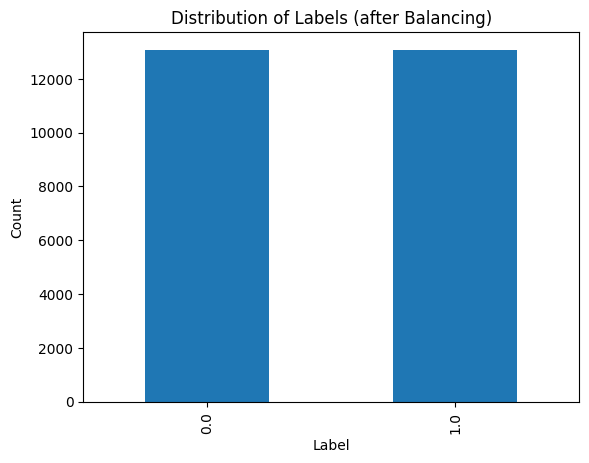

In [98]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
plt.show()

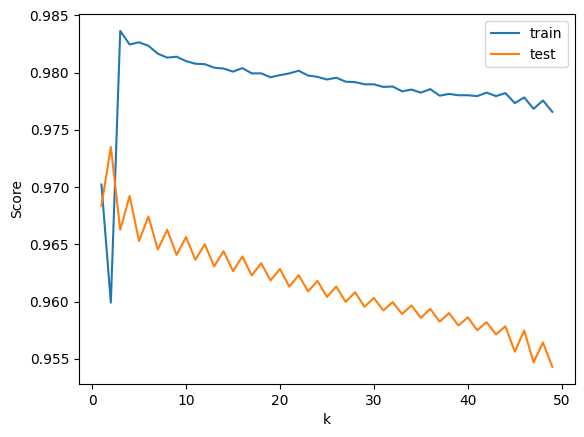

In [145]:
from sklearn.neighbors import KNeighborsClassifier

kNN_accuracy_test = []
kNN_accuracy_train = []


for k in range(1,50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski', p=1)
    kNN.fit(x_train,y_train)
    kNN_accuracy_train.append(kNN.score(x_train,y_train))
    kNN_accuracy_test.append(kNN.score(x_test,y_test))
    
plt.plot(np.arange(1,50), kNN_accuracy_train, label = 'train')
plt.plot(np.arange(1,50), kNN_accuracy_test, label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

In [54]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf','linear'],
              'gamma':[1,0.1,0.01]}

grid = GridSearchCV(SVC(),parameters, refit = True, verbose=2, scoring='neg_mean_squared_error')

grid.fit(x_train,y_train)

best_params = grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   6.6s
[CV] END ................................gamma=1, kernel=rbf; total time=   5.8s
[CV] END ................................gamma=1, kernel=rbf; total time=   5.2s
[CV] END ................................gamma=1, kernel=rbf; total time=   5.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   4.8s
[CV] END .............................gamma=1, kernel=linear; total time=   4.7s
[CV] END .............................gamma=1, kernel=linear; total time=   4.4s
[CV] END .............................gamma=1, kernel=linear; total time=   4.7s
[CV] END .............................gamma=1, kernel=linear; total time=   4.4s
[CV] END .............................gamma=1, kernel=linear; total time=   4.8s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END ..............................gamma=0.1,

In [55]:
print(best_params)

{'gamma': 1, 'kernel': 'rbf'}


In [56]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',gamma=1,random_state=88)

# Train the classifier using the training data
svm.fit(x_train,y_train)

predicted = svm.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9546997106356174 

                Predicted DOS  Predicted Not DOS
Actual DOS             481733              23006
Actual Not DOS              7               3264 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98    504739
         1.0       0.12      1.00      0.22      3271

    accuracy                           0.95    508010
   macro avg       0.56      0.98      0.60    508010
weighted avg       0.99      0.95      0.97    508010



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[90,100,115,130],
              'criterion':['gini','entropy'],
             'max_depth': range(2,20,1),
          'min_samples_split':range(2,10,1),
             'min_samples_leaf':range(1,10,1),
             'max_features':['auto','log2']}

grid = GridSearchCV(RandomForestClassifier(random_state=88),parameters, refit = True, verbose=3, scoring='neg_mean_squared_error')

grid.fit(x_train,y_train)

best_params = grid.best_params_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.028 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.034 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.028 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.034 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.028 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.028 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.028 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.034 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.028 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.028 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.036 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.035 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_sa

[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.035 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.035 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.030 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.032 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.035 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, m

[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.036 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.035 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.033 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_

[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.030 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.032 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.035 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.034 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=6, min

[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.033 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.035 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.035 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=8, m

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.020 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.020 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.021 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.020 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.020 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.020 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.020 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.020 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.020 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.020 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.020 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.020 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.021 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.021 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.021 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.020 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.021 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.021 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   2.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_sa

[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.020 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, m

[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.020 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_

[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.021 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min

[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.021 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.025 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, m

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2,

[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   1.9s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_le

[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.7s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.3s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_le

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   3.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   4.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   3.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   3.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.3s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2,

[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.3s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.4s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.7s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   3.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.6s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_le

[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.2s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.6s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=

[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.1s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.1s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_le

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.014 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.014 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.014 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   4.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.014 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2,

[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.2s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.7s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.5s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.2s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.3s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_le

[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=

[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.3s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   3.0s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.2s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_le

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.030 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.029 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.033 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.030 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.034 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.033 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.030 total time=   1.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.029 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.031 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.033 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.033 total time=   0.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.031 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.030 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.033 total time=   0.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.030 total time=   1.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.029 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.033 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.032 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.030 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.034 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.035 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.035 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_s

[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.034 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.031 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.030 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.032 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.032 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.030 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.034 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.035 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.035 total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.032 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_s

[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.034 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.031 total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.030 total time=   1.3s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.032 total time=   1.3s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.034 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.030 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.034 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.035 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.035 total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.032 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.030 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, min_

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.021 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.021 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.021 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.021 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.020 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.020 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.020 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.020 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.021 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.021 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.021 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.020 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.021 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.020 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.021 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.020 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.021 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.021 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.020 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.020 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.022 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.024 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.024 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.024 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.020 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.024 total time=   1.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.024 total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.021 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.023 total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.024 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_s

[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.023 total time=   1.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.024 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.022 total time=   1.7s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.023 total time=   1.7s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, 

[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.022 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.023 total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.025 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.025 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.022 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_s

[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.025 total time=   1.9s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.025 total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.022 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.021 total time=   1.7s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.023 total time=   1.7s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.025 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.021 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.023 total time=   1.3s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.025 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.025 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.022 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.021 total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.019 total time=   1.5s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.5s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2

[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   1.9s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.2s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.2s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_features

[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.019 total time=   1.4s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   1.9s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2

[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.6s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.3s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.020 total time=   2.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=10, max_features

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.4s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.020 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.019 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.019 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.6s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.7s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.7s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.7s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2

[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.2s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.4s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.3s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.6s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.4s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.4s
[CV 4/5] END criterion=entropy, max_depth=14, max_features

[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.6s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.3s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.3s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   2.6s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.9s
[CV 5/5] END criterion=entropy, max_depth=14, max_features

[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.5s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.014 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.014 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.014 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   3.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.014 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.014 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.014 total time=   4.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   6.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   5.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.014 total time=  14.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   7.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   3.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   4.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   3.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   3.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   4.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   5.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   3.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   4.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   4.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   5.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   8.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   4.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   4.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   3.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   4.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   4.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   4.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   3.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   4.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   3.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   5.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   4.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   4.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   4.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   3.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.019 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   2.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.015 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   3.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   5.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.015 total time=   5.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.019 total time=   3.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   5.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   5.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.015 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.015 total time=   4.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   3.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   6.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   2.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.019 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   2.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.018 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.017 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.016 total time=   4.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115;, score=-0.018 total time=   2.8s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.017 total time=   4.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   5.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   5.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.016 total time=   5.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130;, score=-0.018 total time=   6.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   4.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.016 total time=   4.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.018 total time=   4.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   4.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90;, score=-0.017 total time=   4.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.017 total time=   5.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   5.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   4.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.017 total time=   3.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   4.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   4.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.016 total time=   4.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130;, score=-0.018 total time=   6.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   2.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.017 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   3.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.017 total time=   4.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   6.2s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   6.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   6.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130;, score=-0.018 total time=   3.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   2.5s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.018 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   2.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   2.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.017 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   3.0s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.1s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115;, score=-0.018 total time=   3.3s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.017 total time=   5.9s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   5.7s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   3.6s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   4.4s


C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130;, score=-0.018 total time=   5.2s
[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.4s
[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.6s
[CV 3/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   3.5s
[CV 4/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.015 total time=   2.8s
[CV 5/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=-0.016 total time=   3.4s
[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2

[CV 3/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.1s
[CV 4/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.1s
[CV 5/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115;, score=-0.016 total time=   3.6s
[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   4.3s
[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.015 total time=   4.2s
[CV 3/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130;, score=-0.016 total time=   2.8s
[CV 4/5] END criterion=entropy, max_depth=18, max_features

[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s
[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.015 total time=   1.7s
[CV 3/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s
[CV 4/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.016 total time=   1.7s
[CV 5/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90;, score=-0.017 total time=   1.7s
[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115;, score=-0.015 total time=   2.4s
[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2

[CV 4/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.8s
[CV 5/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115;, score=-0.018 total time=   2.7s
[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.5s
[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.015 total time=   2.5s
[CV 3/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.019 total time=   2.5s
[CV 4/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130;, score=-0.016 total time=   2.6s
[CV 5/5] END criterion=entropy, max_depth=18, max_features

[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.016 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.019 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.017 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90;, score=-0.018 total time=   1.7s
[CV 1/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115;, score=-0.016 total time=   2.2s
[CV 3/5] END criterion=entropy, max_depth=18, max_features=log

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [46]:
print(best_params)

{'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 90}


In [52]:
from sklearn.ensemble import RandomForestClassifier
Rf =  RandomForestClassifier(n_estimators = 90, max_depth = 18, criterion='gini',max_features='auto',min_samples_leaf=2
                             ,min_samples_split=6,random_state=88)
Rf.fit(x_train, y_train)



predicted = Rf.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9709690754119014 

                Predicted DOS  Predicted Not DOS
Actual DOS             489994              14745
Actual Not DOS              3               3268 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.18      1.00      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



## DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

predicted = dt.predict(x_test)


accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


Accuracy: 0.9720281096828802 

                Predicted DOS  Predicted Not DOS
Actual DOS             490594              14145
Actual Not DOS             65               3206 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.18      0.98      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



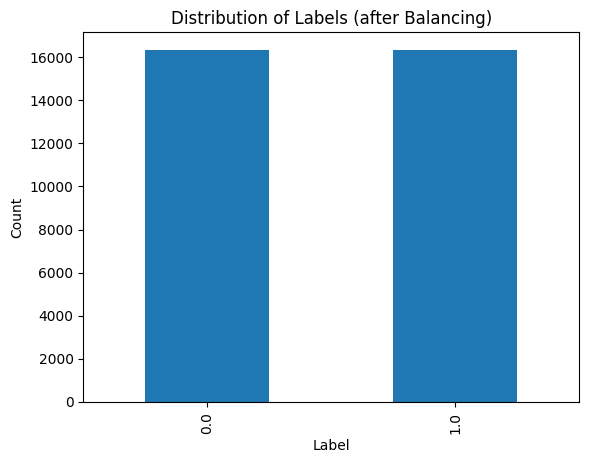

In [101]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x, y)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
plt.show()

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Scores_Dt = cross_val_score(DecisionTreeClassifier(), x, y, cv = 20)

In [103]:
print(Scores_Dt)
Scores_Dt

[0.99186633 0.99354346 0.99356708 0.99358283 0.99518909 0.99393715
 0.9936222  0.99559849 0.99148045 0.96614227 0.96172501 0.99049621
 0.96027622 0.99163005 0.96248878 0.98983481 0.96563046 0.99030724
 0.97422088 0.99277177]


array([0.99186633, 0.99354346, 0.99356708, 0.99358283, 0.99518909,
       0.99393715, 0.9936222 , 0.99559849, 0.99148045, 0.96614227,
       0.96172501, 0.99049621, 0.96027622, 0.99163005, 0.96248878,
       0.98983481, 0.96563046, 0.99030724, 0.97422088, 0.99277177])

## LogisticRegression

In [104]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9419125607763627 

                Predicted DOS  Predicted Not DOS
Actual DOS             475263              29476
Actual Not DOS             33               3238 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.99      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.97      0.57    508010
weighted avg       0.99      0.94      0.96    508010



In [105]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(x_train,y_train)

predicted = NB.predict(x_test)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9389500206688844 

                Predicted DOS  Predicted Not DOS
Actual DOS             473797              30942
Actual Not DOS             72               3199 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.09      0.98      0.17      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.96      0.57    508010
weighted avg       0.99      0.94      0.96    508010



In [107]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)

kNN.fit(x_train,y_train)

predicted = kNN.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9729139190173421 

                Predicted DOS  Predicted Not DOS
Actual DOS             491286              13453
Actual Not DOS            307               2964 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.18      0.91      0.30      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.94      0.64    508010
weighted avg       0.99      0.97      0.98    508010



In [106]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier()

kNN.fit(x_train,y_train)

predicted = kNN.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9629771067498671 

                Predicted DOS  Predicted Not DOS
Actual DOS             485955              18784
Actual Not DOS             24               3247 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    504739
         1.0       0.15      0.99      0.26      3271

    accuracy                           0.96    508010
   macro avg       0.57      0.98      0.62    508010
weighted avg       0.99      0.96      0.98    508010



In [108]:
from sklearn.ensemble import RandomForestClassifier
Rf =  RandomForestClassifier()
Rf.fit(x_train, y_train)



predicted = Rf.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9716226058542154 

                Predicted DOS  Predicted Not DOS
Actual DOS             490323              14416
Actual Not DOS              0               3271 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.18      1.00      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.99      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [111]:
from sklearn.ensemble import RandomForestClassifier
Rf =  RandomForestClassifier(n_estimators = 110, max_depth = 30, random_state=88)
Rf.fit(x_train, y_train)



predicted = Rf.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.971683628275034 

                Predicted DOS  Predicted Not DOS
Actual DOS             490354              14385
Actual Not DOS              0               3271 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      1.00      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.99      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [112]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(random_state=88)

# Train the classifier using the training data
svm.fit(x_train,y_train)

predicted = svm.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9493159583472767 

                Predicted DOS  Predicted Not DOS
Actual DOS             478994              25745
Actual Not DOS              3               3268 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    504739
         1.0       0.11      1.00      0.20      3271

    accuracy                           0.95    508010
   macro avg       0.56      0.97      0.59    508010
weighted avg       0.99      0.95      0.97    508010



In [113]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',gamma=1,random_state=88)

# Train the classifier using the training data
svm.fit(x_train,y_train)

predicted = svm.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9566347119151197 

                Predicted DOS  Predicted Not DOS
Actual DOS             482716              22023
Actual Not DOS              7               3264 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    504739
         1.0       0.13      1.00      0.23      3271

    accuracy                           0.96    508010
   macro avg       0.56      0.98      0.60    508010
weighted avg       0.99      0.96      0.97    508010



# Features Selection

## Filter methods

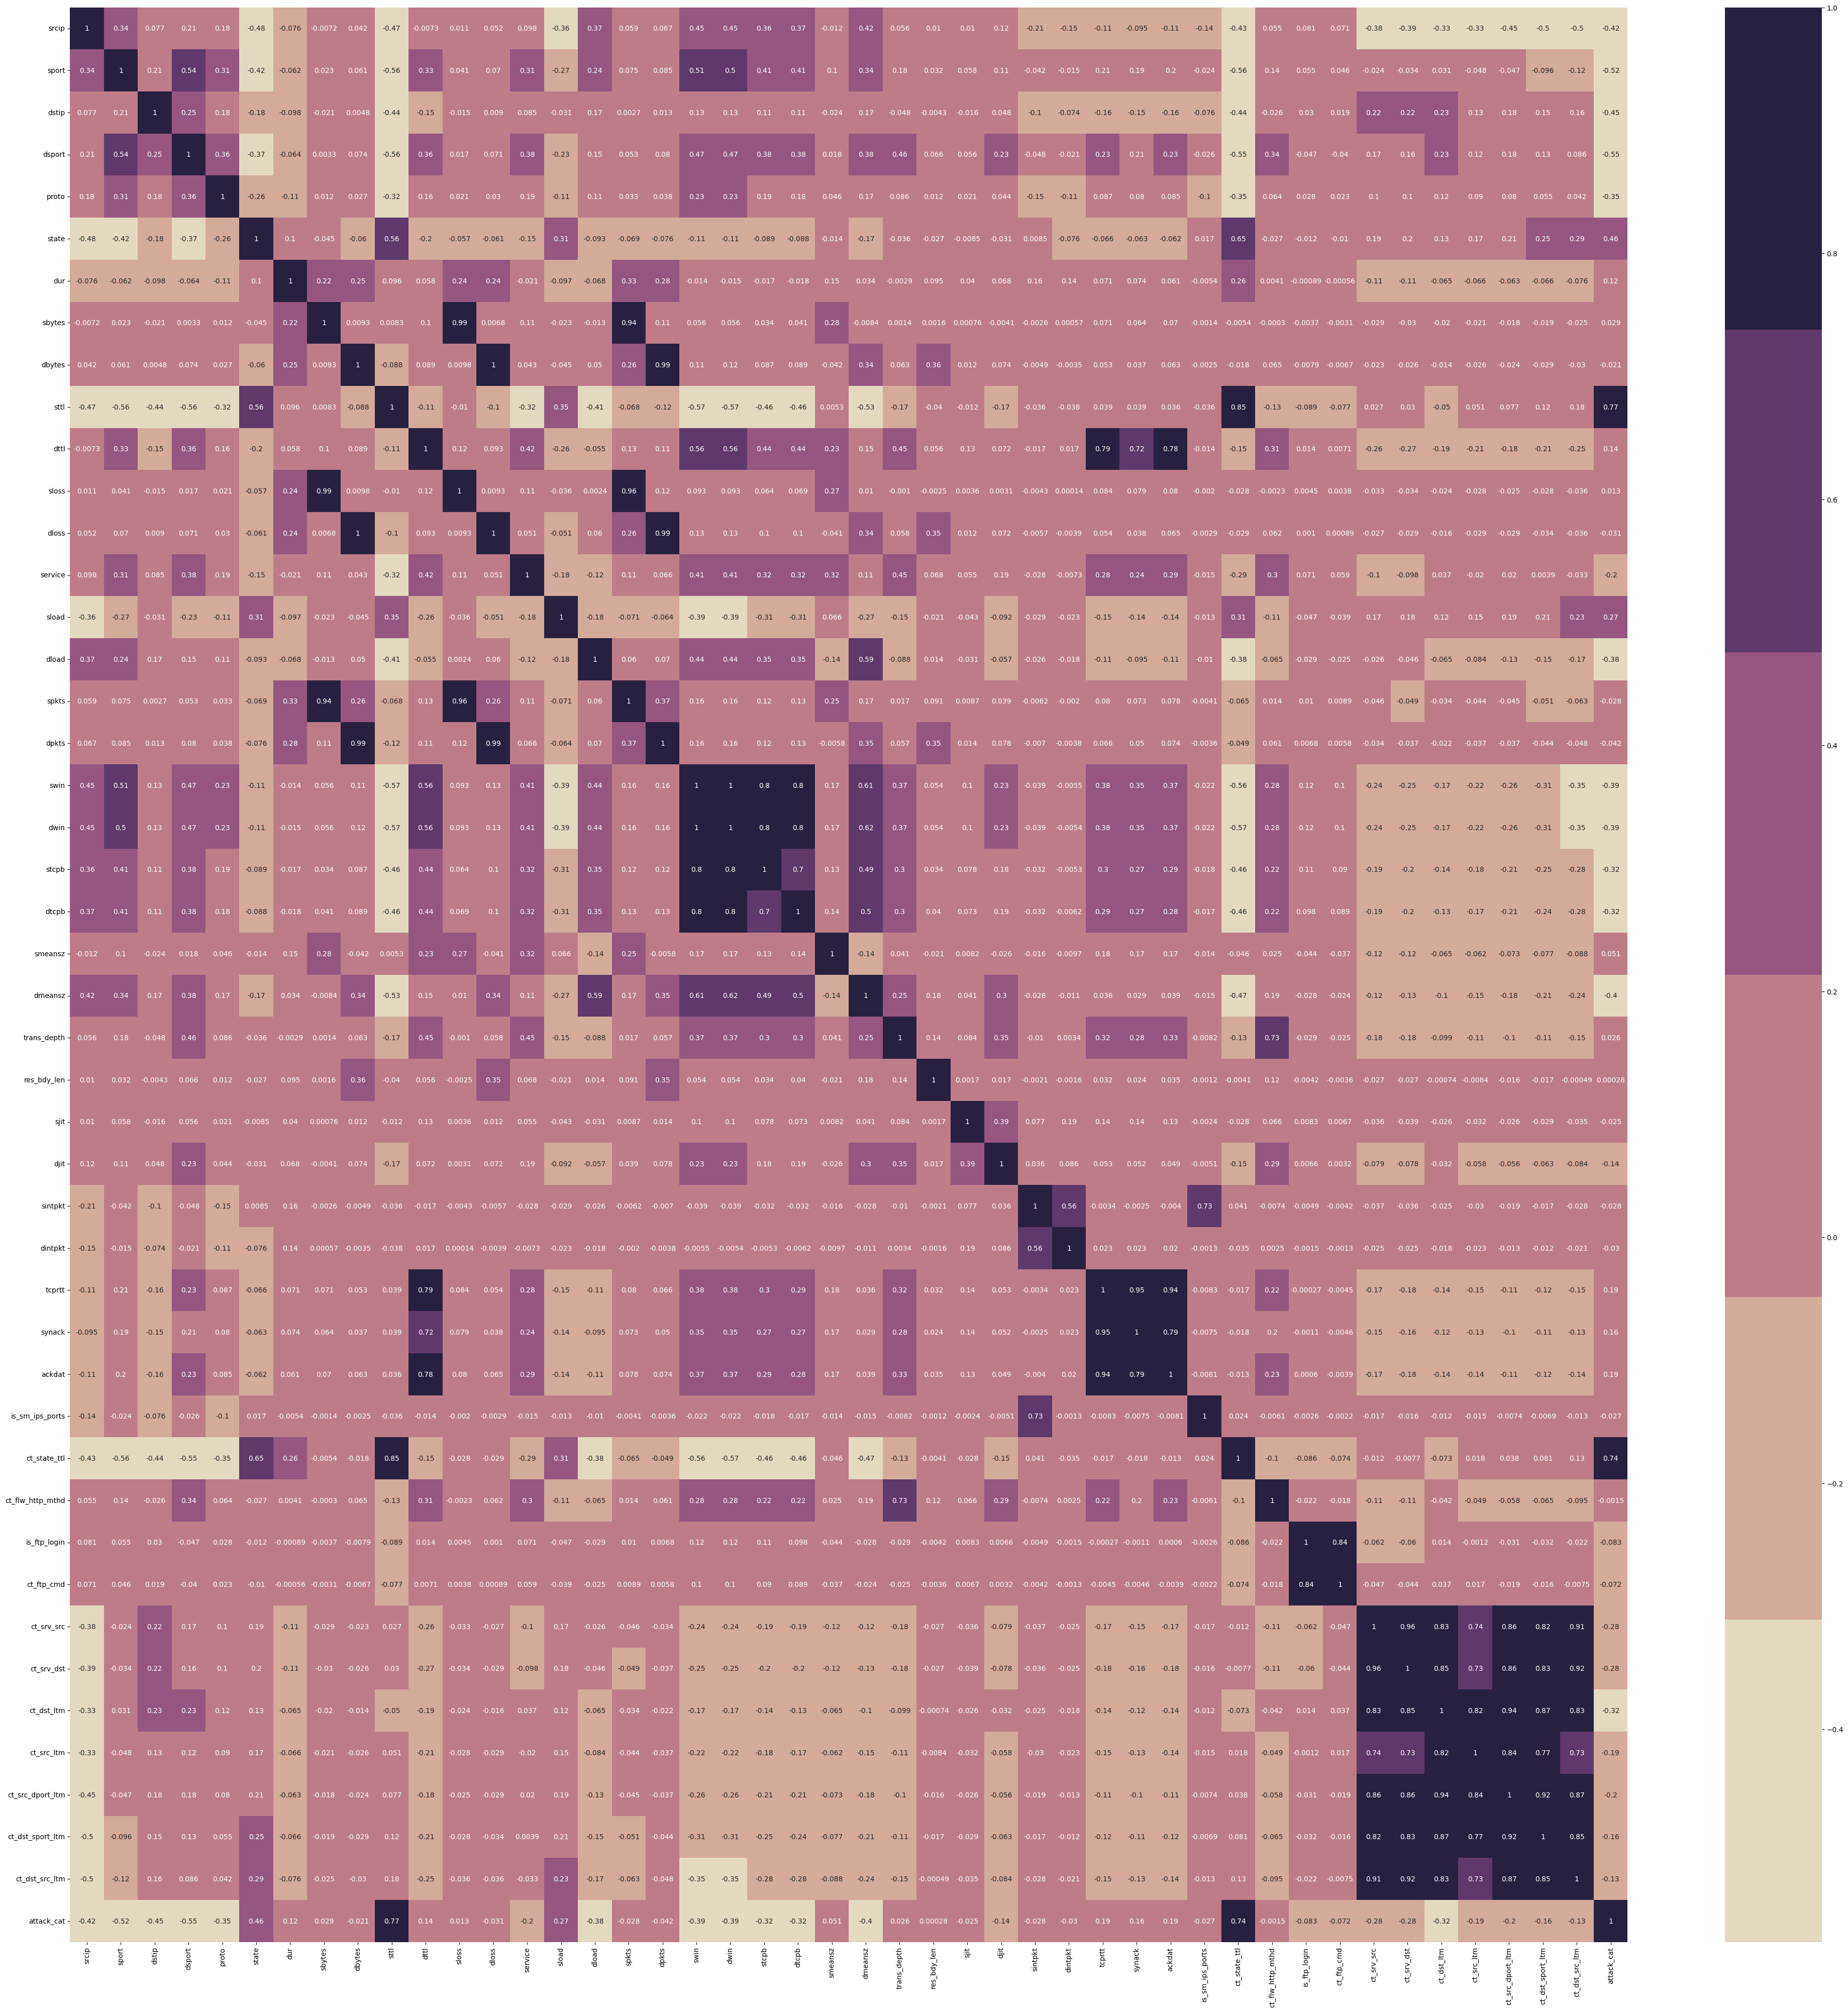

In [52]:
train = pd.concat([x_train,y_train],axis=1)
#corr=train.corr()
#train.head(20)
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, cmap= sns.color_palette("ch:s=-.2, r=.6"),annot=True)
plt.show()

In [51]:

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)

['dloss', 'dpkts', 'dwin']


In [52]:
X_train_selected = x_train.drop(['dloss', 'dpkts', 'dwin'], axis=1)
X_train_selected.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.738095,0.007012,0.391304,0.732550,0.895522,0.400000,2.276184e-10,0.000008,0.000000,0.996078,...,0.000000,0.0,0.000,0.303030,0.303030,0.090909,0.106061,0.090909,0.050847,0.303030
1,0.809524,0.613229,0.500000,0.187346,0.850746,0.333333,2.864691e-06,0.000204,0.000255,0.121569,...,0.000000,1.0,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.809524,0.114119,0.478261,0.951245,0.850746,0.333333,2.131760e-06,0.000107,0.000112,0.121569,...,0.000000,0.0,0.000,0.121212,0.090909,0.106061,0.136364,0.075758,0.000000,0.075758
3,0.904762,0.883466,0.456522,0.018598,0.895522,0.133333,5.359274e-07,0.000040,0.000021,0.121569,...,0.000000,0.0,0.000,0.136364,0.136364,0.015152,0.015152,0.000000,0.000000,0.030303
4,1.000000,0.898218,0.500000,0.968698,0.850746,0.333333,1.244831e-04,0.000110,0.000694,0.121569,...,0.027778,0.0,0.000,0.015152,0.030303,0.045455,0.030303,0.000000,0.000000,0.000000


In [53]:
dt = DecisionTreeClassifier(random_state=88)
dt.fit(X_train_selected, y_train)
X_test_selected = x_test.drop(['dloss', 'dpkts', 'dwin'], axis=1)
predicted = dt.predict(X_test_selected)

#plt.figure(figsize=(20, 10))
#plot_tree(dt, filled=True)
#plt.show()

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


Accuracy: 0.9712190704907384 

                Predicted DOS  Predicted Not DOS
Actual DOS             490181              14558
Actual Not DOS             63               3208 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.18      0.98      0.30      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [54]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(X_train_selected,y_train)

predicted = Lr.predict(X_test_selected)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9432727702210586 

                Predicted DOS  Predicted Not DOS
Actual DOS             475954              28785
Actual Not DOS             33               3238 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.99      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.97      0.58    508010
weighted avg       0.99      0.94      0.97    508010



In [55]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(X_train_selected,y_train)

predicted = NB.predict(X_test_selected)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.935001279502372 

                Predicted DOS  Predicted Not DOS
Actual DOS             471785              32954
Actual Not DOS             66               3205 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.97    504739
         1.0       0.09      0.98      0.16      3271

    accuracy                           0.94    508010
   macro avg       0.54      0.96      0.56    508010
weighted avg       0.99      0.94      0.96    508010



In [56]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',random_state=88)

# Train the classifier using the training data
svm.fit(X_train_selected,y_train)

predicted = svm.predict(X_test_selected)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9494399716541013 

                Predicted DOS  Predicted Not DOS
Actual DOS             479058              25681
Actual Not DOS              4               3267 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    504739
         1.0       0.11      1.00      0.20      3271

    accuracy                           0.95    508010
   macro avg       0.56      0.97      0.59    508010
weighted avg       0.99      0.95      0.97    508010



In [101]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


corr = train.corr()
#plt.figure(figsize=(50,50))
#sns.heatmap(corr, cmap= sns.color_palette("ch:s=-.2, r=.6"),annot=True)
#plt.show()
cor_target=corr['attack_cat']
relevant_features= cor_target[(cor_target > 0.2)|(cor_target < -0.1)]
names=[index for index, value in relevant_features.items()]
names.remove('attack_cat')
print(names)

# DecisionTrees:
X_train_selected = x_train[names]
# model = DecisionTreeClassifier()
 

dt = DecisionTreeClassifier(random_state=88)
dt.fit(X_train_selected, y_train)
X_test_selected = x_test[names]
predicted = dt.predict(X_test_selected)

#plt.figure(figsize=(20, 10))
#plot_tree(dt, filled=True)
#plt.show()

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'sttl', 'service', 'sload', 'dload', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmeansz', 'djit', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
Accuracy: 0.9724375504419205 

                Predicted DOS  Predicted Not DOS
Actual DOS             490790              13949
Actual Not DOS             53               3218 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      0.98      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [102]:


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(X_train_selected,y_train)

predicted = NB.predict(X_test_selected)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9510639554339482 

                Predicted DOS  Predicted Not DOS
Actual DOS             480125              24614
Actual Not DOS            246               3025 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    504739
         1.0       0.11      0.92      0.20      3271

    accuracy                           0.95    508010
   macro avg       0.55      0.94      0.59    508010
weighted avg       0.99      0.95      0.97    508010



In [103]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(X_train_selected,y_train)

predicted = Lr.predict(X_test_selected)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9384185350682073 

                Predicted DOS  Predicted Not DOS
Actual DOS             473516              31223
Actual Not DOS             61               3210 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.09      0.98      0.17      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.96      0.57    508010
weighted avg       0.99      0.94      0.96    508010



In [104]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',random_state=88)

# Train the classifier using the training data
svm.fit(X_train_selected,y_train)

predicted = svm.predict(X_test_selected)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9484675498513809 

                Predicted DOS  Predicted Not DOS
Actual DOS             478564              26175
Actual Not DOS              4               3267 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    504739
         1.0       0.11      1.00      0.20      3271

    accuracy                           0.95    508010
   macro avg       0.56      0.97      0.59    508010
weighted avg       0.99      0.95      0.97    508010



# RandomForestClassifier feature selection+Classification

In [67]:
# Load the dataset

from sklearn.feature_selection import SelectFromModel


# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
sel =SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=88))

# Train the classifier using the training set
sel.fit(x_train, y_train)

# Get the feature importances
sel.get_support()
# Sort the features based on their importances in descending order
selected_fet=x_train.columns[(sel.get_support())]

print('nbr of features selected  ',len(selected_fet))

print(' features selected  ',selected_fet)



# Train a new classifier using only the selected features
rf_new = RandomForestClassifier(n_estimators=100)
rf_new.fit(x_train.loc[:, selected_fet], y_train)

# Test the new classifier using the testing set and evaluate its performance
y_pred = rf_new.predict(x_test.loc[:, selected_fet])
score = rf_new.score(x_test.loc[:, selected_fet], y_test)
print("Accuracy score: ", score)


Conf_Mat = confusion_matrix(y_test,y_pred)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,y_pred)
print("Classification report:\n", report)


nbr of features selected   16
 features selected   Index(['srcip', 'sport', 'dstip', 'dsport', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'dload', 'dpkts', 'dmeansz', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst',
       'ct_src_dport_ltm', 'ct_dst_src_ltm'],
      dtype='object', name='Name')
Accuracy score:  0.9723883388122281
                Predicted DOS  Predicted Not DOS
Actual DOS             490718              14021
Actual Not DOS              6               3265 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      1.00      0.32      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.99      0.65    508010
weighted avg       0.99      0.97      0.98    508010



In [68]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train.loc[:, selected_fet], y_train)

predicted = Lr.predict(x_test.loc[:, selected_fet])

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9407629771067498 

                Predicted DOS  Predicted Not DOS
Actual DOS             474685              30054
Actual Not DOS             39               3232 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.99      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.96      0.57    508010
weighted avg       0.99      0.94      0.96    508010



In [69]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',random_state=88)

# Train the classifier using the training data
svm.fit(x_train.loc[:, selected_fet],y_train)

predicted = svm.predict(x_test.loc[:, selected_fet])
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.9498238223657015 

                Predicted DOS  Predicted Not DOS
Actual DOS             479253              25486
Actual Not DOS              4               3267 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    504739
         1.0       0.11      1.00      0.20      3271

    accuracy                           0.95    508010
   macro avg       0.56      0.97      0.59    508010
weighted avg       0.99      0.95      0.97    508010



## CFS(mutual_info_classif)

<Axes: xlabel='Name'>

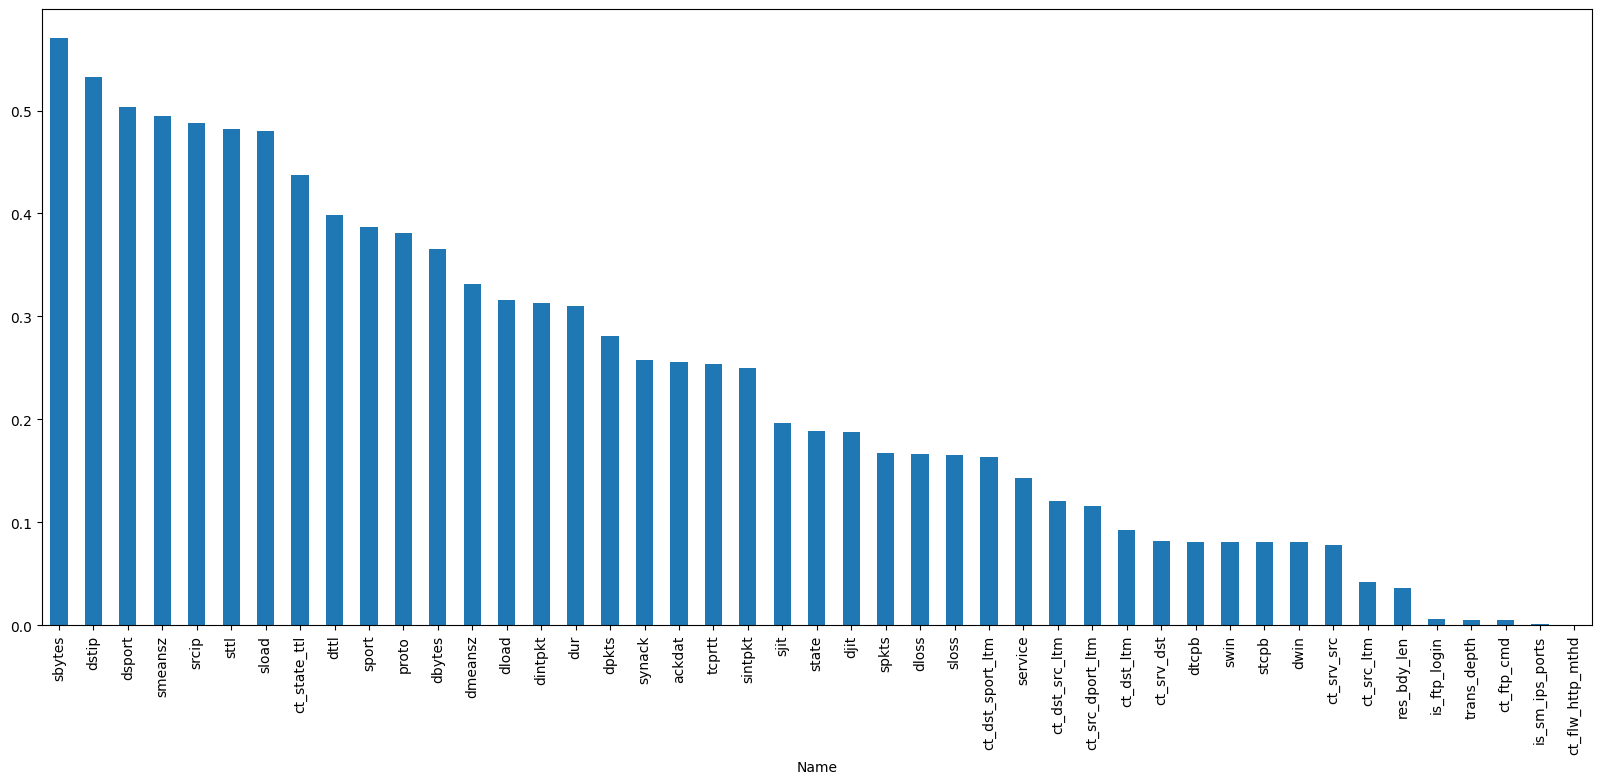

In [70]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.neighbors import KNeighborsClassifier
# Apply CFS to reduce the number of features to 30
#sfs1 = SFS(KNeighborsClassifier(n_neighbors=5),
          # k_features=30,
          # forward=True,
           #floating=False,
          # scoring='accuracy',
          # cv=0)
#sfs1 = sfs1.fit(x_train, y_train)
#X_train_cfs = X_train[:,sfs1.k_feature_idx_]*/

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=40)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'res_bdy_len', 'sjit', 'djit', 'sintpkt', 'dintpkt',
       'tcprtt', 'synack', 'ackdat', 'ct_state_ttl', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
      dtype='object')


### DecisionTreeClassifier

Accuracy: 0.9719178756323694 

                Predicted DOS  Predicted Not DOS
Actual DOS             490531              14208
Actual Not DOS             58               3213 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.18      0.98      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



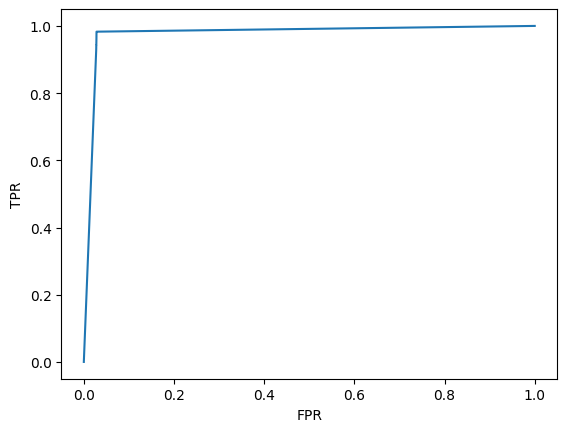

0.9769344562508632


In [72]:
dt = DecisionTreeClassifier(random_state=88)

dt.fit(X_train_new, y_train)

predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")


Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### RandomForestClassifier

Accuracy: 0.9718588216767386 

                Predicted DOS  Predicted Not DOS
Actual DOS             490448              14291
Actual Not DOS              5               3266 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      1.00      0.31      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.99      0.65    508010
weighted avg       0.99      0.97      0.98    508010



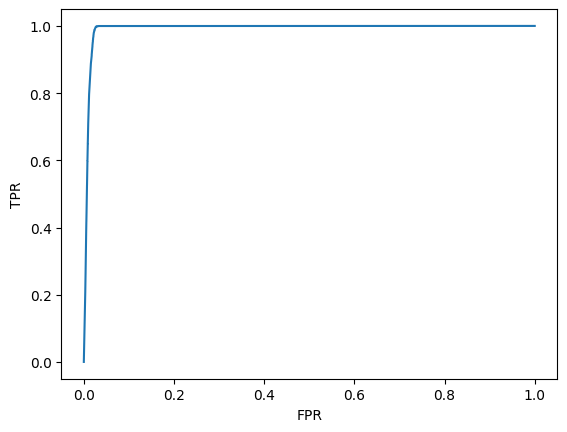

0.9921131011559509


In [73]:
Rf =  RandomForestClassifier(n_estimators =100)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### LogisticRegression

Accuracy: 0.9432944233381233 

                Predicted DOS  Predicted Not DOS
Actual DOS             475963              28776
Actual Not DOS             31               3240 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.99      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.97      0.58    508010
weighted avg       0.99      0.94      0.97    508010



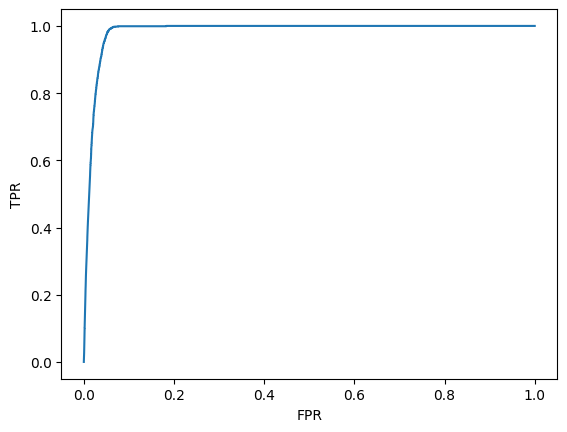

0.9841768080433863


In [74]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9559240959823625 

                Predicted DOS  Predicted Not DOS
Actual DOS             482360              22379
Actual Not DOS             12               3259 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    504739
         1.0       0.13      1.00      0.23      3271

    accuracy                           0.96    508010
   macro avg       0.56      0.98      0.60    508010
weighted avg       0.99      0.96      0.97    508010



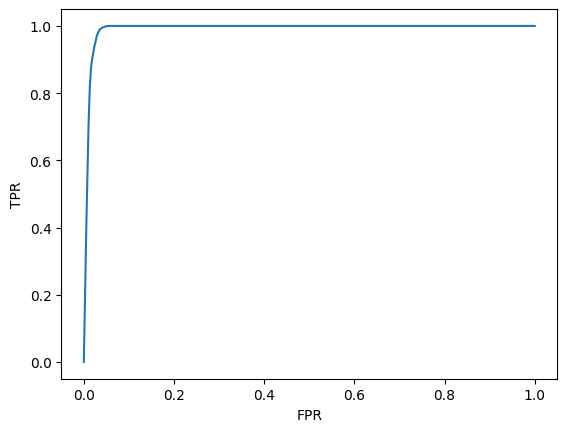

0.9911736173232464


In [75]:
"""""""""""""""
k-NN Classifier

"""""""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)

kNN.fit(X_train_new,y_train)

predicted = kNN.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = kNN.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9440778724828252 

                Predicted DOS  Predicted Not DOS
Actual DOS             476441              28298
Actual Not DOS            111               3160 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.97      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.96      0.58    508010
weighted avg       0.99      0.94      0.97    508010



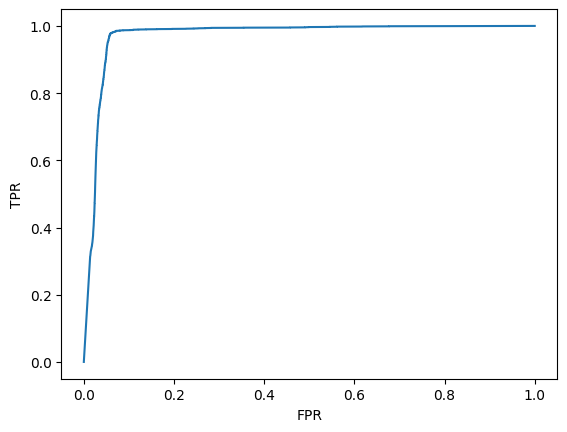

0.9713567876124994


In [76]:
"""""""""""""""
Naive Bayes Classifier

"""""""""""""""

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(X_train_new,y_train)

predicted = NB.predict(X_test_new)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = NB.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9493868230940335 

                Predicted DOS  Predicted Not DOS
Actual DOS             479031              25708
Actual Not DOS              4               3267 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    504739
         1.0       0.11      1.00      0.20      3271

    accuracy                           0.95    508010
   macro avg       0.56      0.97      0.59    508010
weighted avg       0.99      0.95      0.97    508010



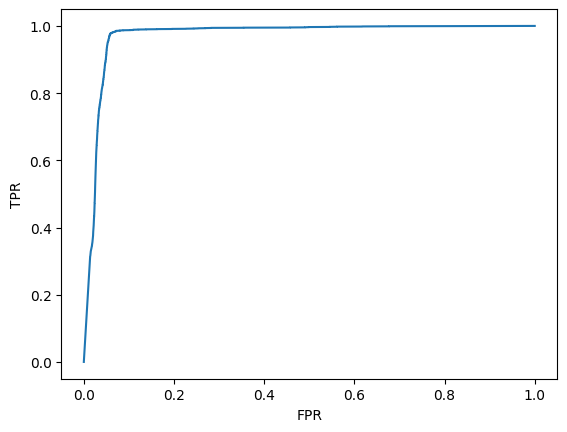

0.9713567876124994


In [77]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',random_state=88)

# Train the classifier using the training data
svm.fit(X_train_new, y_train)

predicted = svm.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = NB.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

## Wrapper Methods

### RFE

### DecisionTreeClassifier

Accuracy: 0.9727072301726344 

                Predicted DOS  Predicted Not DOS
Actual DOS             490931              13808
Actual Not DOS             57               3214 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      0.98      0.32      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



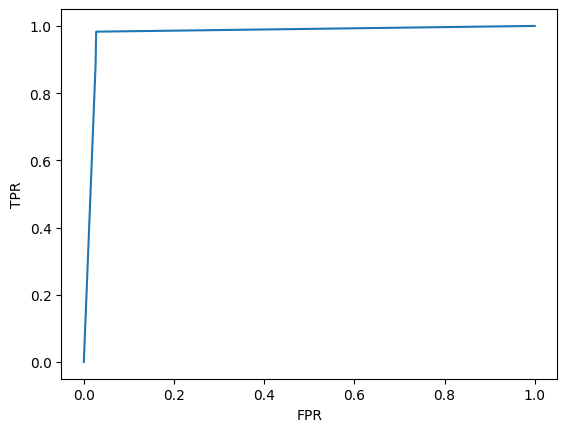

0.9770419691906367


In [78]:
from sklearn.feature_selection import RFE
estimator = DecisionTreeClassifier()
selector = RFE(estimator)

selector = selector.fit(x_train, y_train)


predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


### RandomForestClassifier

Accuracy: 0.9724178657900435 

                Predicted DOS  Predicted Not DOS
Actual DOS             490734              14005
Actual Not DOS              7               3264 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      1.00      0.32      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.99      0.65    508010
weighted avg       0.99      0.97      0.98    508010



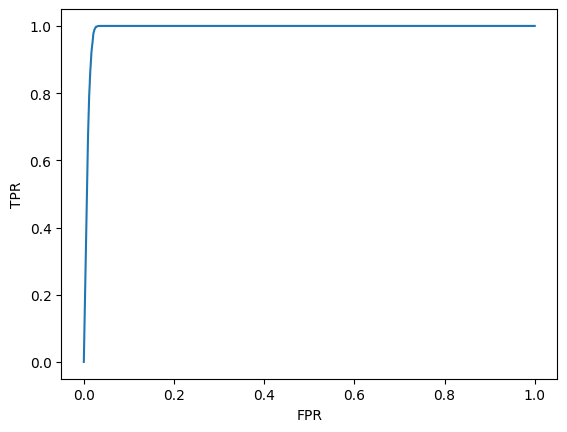

0.9921625484226082


In [79]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators =100)
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


###  LogisticRegression

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Accuracy: 0.9417550835613472 

                Predicted DOS  Predicted Not DOS
Actual DOS             475179              29560
Actual Not DOS             29               3242 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.99      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.97      0.57    508010
weighted avg       0.99      0.94      0.96    508010



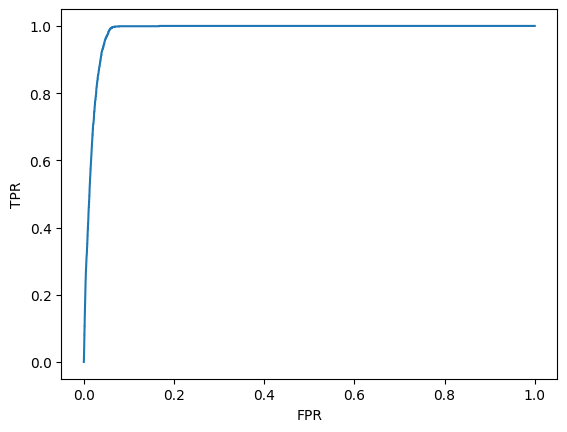

0.9838462440939529


In [80]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


## Embedded Methods

### chi2 

<Axes: xlabel='Name'>

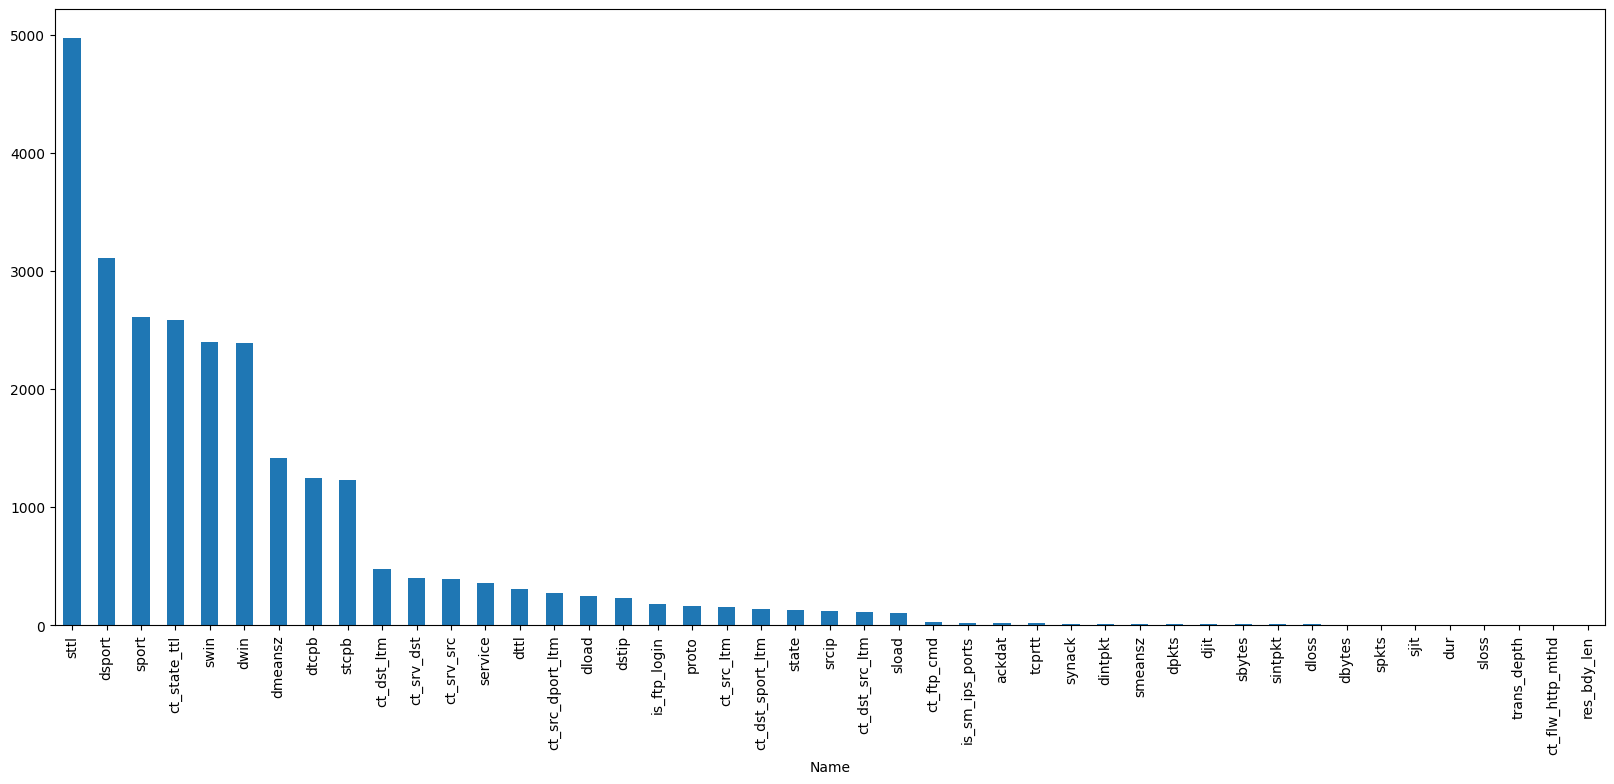

In [82]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(x_train, y_train)
chi_scores = pd.Series(chi_scores)
p_values = pd.Series(p_values)
chi_scores.index = p_values.index = x_train.columns
chi_scores.sort_values(ascending=False)
chi_scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [121]:
from sklearn.feature_selection import SelectKBest

# Feature extraction
selector = SelectKBest(score_func=chi2, k=13)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)
# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['sport', 'dsport', 'sttl', 'service', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'dmeansz', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm'],
      dtype='object')


### DecisionTreeClassifier

Accuracy: 0.9730005314856007 

                Predicted DOS  Predicted Not DOS
Actual DOS             491070              13669
Actual Not DOS             47               3224 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    504739
         1.0       0.19      0.99      0.32      3271

    accuracy                           0.97    508010
   macro avg       0.60      0.98      0.65    508010
weighted avg       0.99      0.97      0.98    508010



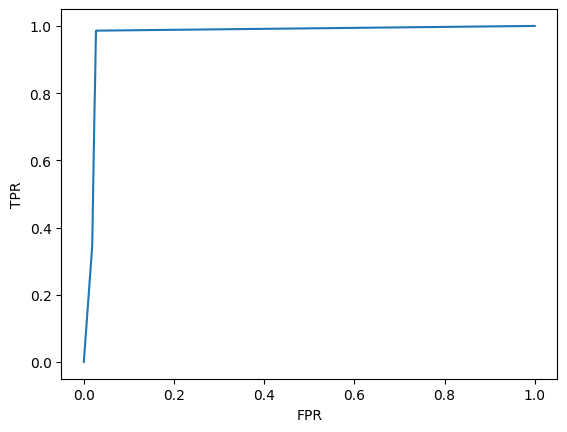

0.9750139425846801


In [122]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train)
predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### RandomForestClassifier

Accuracy: 0.9706304993996181 

                Predicted DOS  Predicted Not DOS
Actual DOS             489824              14915
Actual Not DOS              5               3266 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    504739
         1.0       0.18      1.00      0.30      3271

    accuracy                           0.97    508010
   macro avg       0.59      0.98      0.64    508010
weighted avg       0.99      0.97      0.98    508010



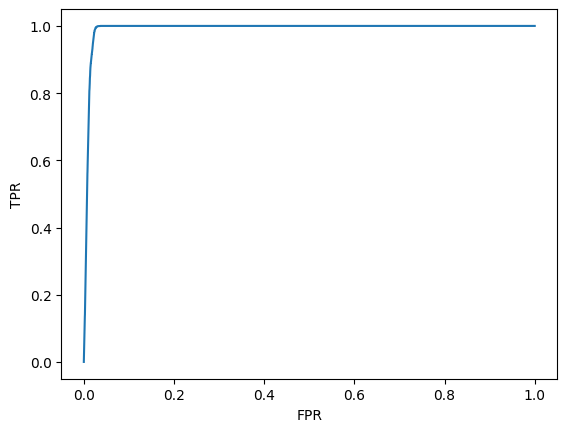

0.9918137552321893


In [133]:
Rf =  RandomForestClassifier(n_estimators =1000,max_depth=40,random_state=88)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### LogisticRegression

Accuracy: 0.941564142438141 

                Predicted DOS  Predicted Not DOS
Actual DOS             475138              29601
Actual Not DOS             85               3186 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.10      0.97      0.18      3271

    accuracy                           0.94    508010
   macro avg       0.55      0.96      0.57    508010
weighted avg       0.99      0.94      0.96    508010



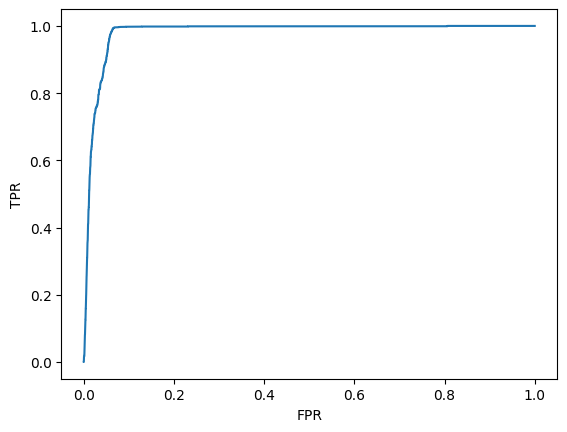

0.9805488965375229


In [134]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9425365642408614 

                Predicted DOS  Predicted Not DOS
Actual DOS             476100              28639
Actual Not DOS            553               2718 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    504739
         1.0       0.09      0.83      0.16      3271

    accuracy                           0.94    508010
   macro avg       0.54      0.89      0.56    508010
weighted avg       0.99      0.94      0.97    508010



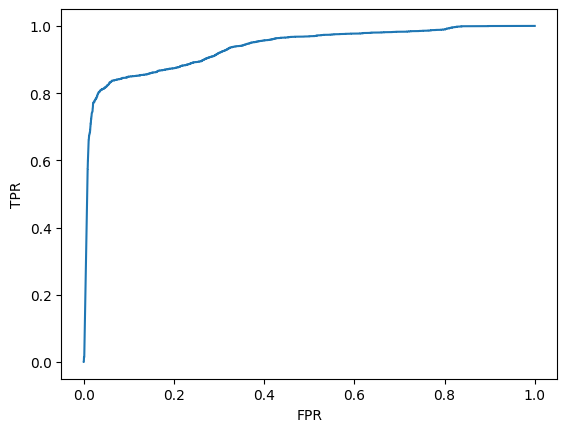

0.9361157447420472


In [135]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

NB = GaussianNB()

NB.fit(X_train_new,y_train)

predicted = NB.predict(X_test_new)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = NB.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

Accuracy: 0.9579063404263696 

                Predicted DOS  Predicted Not DOS
Actual DOS             483400              21339
Actual Not DOS             45               3226 

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    504739
         1.0       0.13      0.99      0.23      3271

    accuracy                           0.96    508010
   macro avg       0.57      0.97      0.61    508010
weighted avg       0.99      0.96      0.97    508010



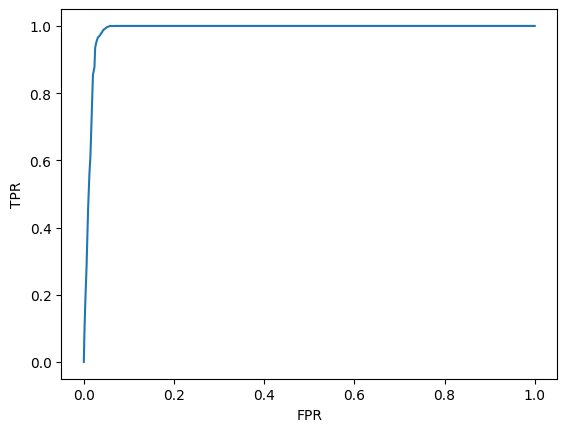

0.9876214980062501


In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

kNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)

kNN.fit(X_train_new,y_train)

predicted = kNN.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = kNN.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

In [ ]:
"""""""""""""""
SVM Classifier

"""""""""""""""
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a SVM classifier with RBF kernel
svm = SVC(kernel='rbf',random_state=88)

# Train the classifier using the training data
svm.fit(X_train_new, y_train)

predicted = svm.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

y_prob = NB.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)